In [144]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [145]:
df=pd.read_csv("credit.csv")
y=df["Balance"]
X=df.iloc[:,1:5]
string_list=["Income","Limit", "Rating", "Cards"]
x_train, x_test, y_train, y_test= train_test_split(X, y, shuffle=True, train_size=0.2)
lasso_alphas=np.arange(0,10000,10)
Coef_List=[]
Metric_List=[]


In [146]:
for alphas in lasso_alphas:
    lasso=Lasso(alpha=alphas)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    Metric_List.append(r2_score(y_pred,y_test))
    Coef_List.append(lasso.coef_)
    
Array=np.array(Coef_List)


C:\Users\johan\AppData\Local\Temp/ipykernel_2624/2806386284.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train,y_train)
C:\Users\johan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\johan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+06, tolerance: 1.686e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

In [148]:
Array

array([[-8.29782023,  0.16294929,  1.46373304, 36.92902825],
       [-8.26975619,  0.13876138,  1.83245183, 29.61290692],
       [-8.24145001,  0.11522832,  2.19143687, 22.34163889],
       ...,
       [-0.        ,  0.17876827,  0.        ,  0.        ],
       [-0.        ,  0.17876605,  0.        ,  0.        ],
       [-0.        ,  0.17876384,  0.        ,  0.        ]])

Text(0.5, 0, 'alpha')

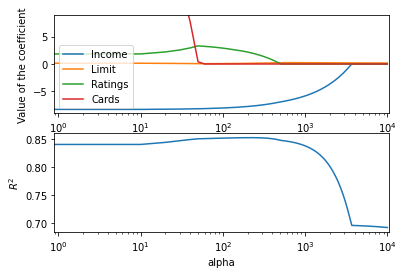

In [147]:
fig= plt.figure()
spec=fig.add_gridspec(ncols=1, nrows=2)

ax0=fig.add_subplot(spec[0,0])
ax0.set_xscale('log')
ax0.set_xlim(right=10500)
ax0.set_ylim(-9,9)
ax0.set_ylabel("Value of the coefficient")
ax0.plot(lasso_alphas, Array[:,0], label="Income")
ax0.plot(lasso_alphas, Array[:,1], label="Limit")
ax0.plot(lasso_alphas, Array[:,2], label="Ratings")
ax0.plot(lasso_alphas, Array[:,3], label="Cards")
ax0.legend(loc='lower left')

ax1=fig.add_subplot(spec[1,0], sharex=ax0)
ax1.plot(lasso_alphas, Metric_List)
ax1.set_ylabel("$R^2$")
ax1.set_xlabel("alpha")